## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.drop('CustomerID' ,axis=1 ,inplace=True)

## Handling Missing Values

In [7]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

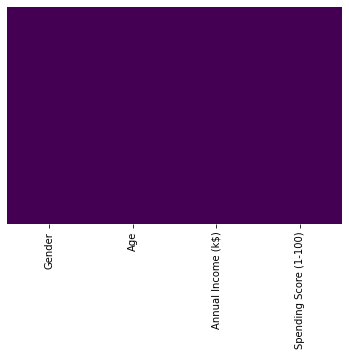

In [8]:
sns.heatmap(data.isnull() ,yticklabels=False ,cbar=False ,cmap='viridis')

## Correlation

In [9]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

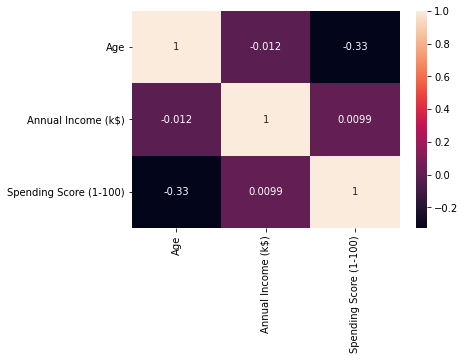

In [10]:
sns.heatmap(data.corr() ,annot=True)

## Analysing Gender

In [11]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

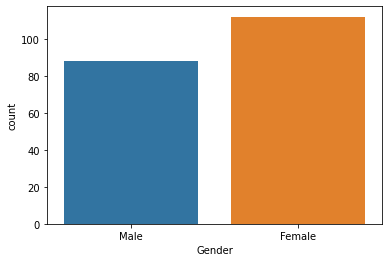

In [12]:
sns.countplot(x='Gender',data=data)

## Analysing Age

In [13]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

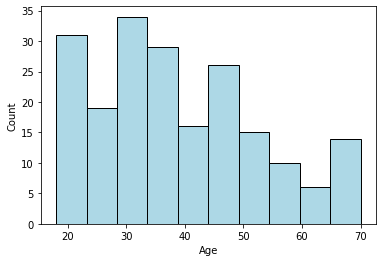

In [14]:
plt.hist(x=data['Age'] ,bins=10 ,color='lightblue' ,ec='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Analysing Age VS Spending Score

In [15]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

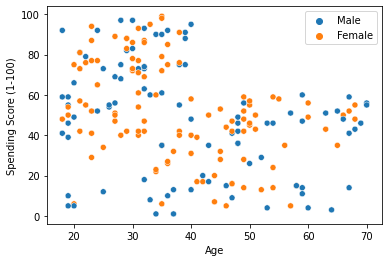

In [16]:
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

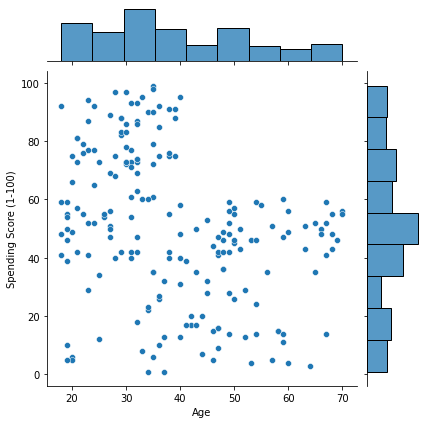

In [17]:
sns.jointplot(data=data, x='Age', y='Spending Score (1-100)')

## Aanalysing Annual Income VS Spending Score

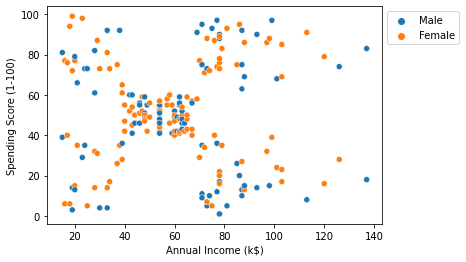

In [18]:
sns.scatterplot(data=data, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Gender')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

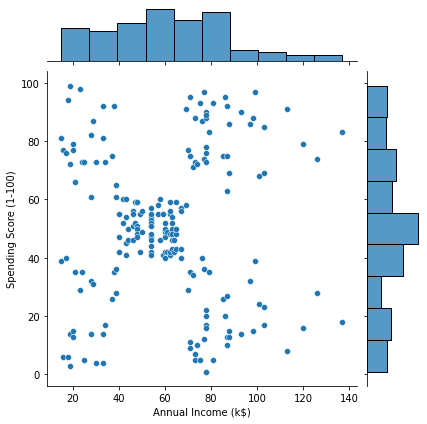

In [19]:
sns.jointplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

## Feature Scaling

In [20]:
X = data.iloc[: ,[2,3]]
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X = scaler.fit_transform(X)

## Plotting inertia-vs-clusters graph (aka Elbow Curve) to find the optimal amount of clusters for the dataset

In [22]:
from sklearn.cluster import KMeans 

L = []
for i in range(1,20):
    model = KMeans(n_clusters=i ,init='k-means++')
    model.fit(X)
    L.append(model.inertia_)

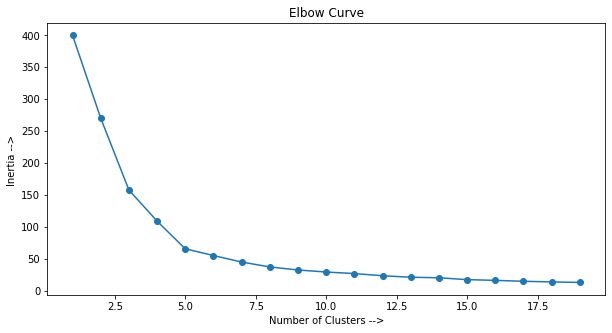

In [23]:
frame = ({'i': range(1,20) ,'L':L})

plt.figure(figsize=(10,5))
plt.plot(frame['i'] ,frame['L'],marker='o')
plt.xlabel('Number of Clusters -->')
plt.ylabel('Inertia --> ')
plt.title('Elbow Curve')
plt.show()

### So the optimal number of clusters : 5-6

## Model Building

In [24]:
model = KMeans(n_clusters=5 ,init='k-means++' ,random_state=42)
y_predict = model.fit_predict(X)

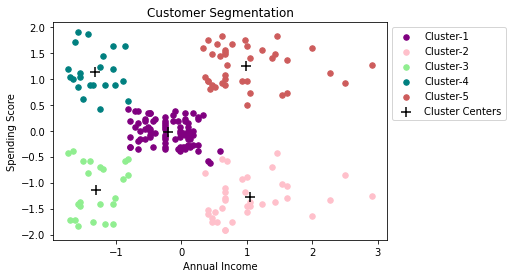

In [25]:
plt.scatter(x = X[y_predict ==0,0] ,y = X[y_predict == 0,1] ,s=30 ,c='purple' ,label='Cluster-1')
plt.scatter(x = X[y_predict ==1,0] ,y = X[y_predict == 1,1] ,s=30 ,c='pink' ,label='Cluster-2')
plt.scatter(x = X[y_predict ==2,0] ,y = X[y_predict == 2,1] ,s=30 ,c='lightgreen' ,label='Cluster-3')
plt.scatter(x = X[y_predict ==3,0] ,y = X[y_predict == 3,1] ,s=30 ,c='teal' ,label='Cluster-4')
plt.scatter(x=X[y_predict == 4, 0], y=X[y_predict == 4, 1], s=30, c='indianred', label='Cluster-5')


# cluster center 
plt.scatter(x=model.cluster_centers_[: ,0] ,y=model.cluster_centers_[:,1] ,s=100 ,c='black' ,marker='+' ,label='Cluster Centers') 

plt.title('Customer Segmentation')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Observations


a. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

b. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.

c. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

d. Low Income, Low Spending Score (Cluster 4) - Don't target these customers since they have less income.

e. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.